# Sentiment Analysis
##### Niloufar Babaahmadi 610398103

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
data = pd.read_csv("SandersPosNeg.csv")
print("sanders")
data

sanders


,0\tRT @cjwallace03: So apparently @apple put MB cap on your SMS with the new update. 25mb storage before it tells you your inbox is full. What is this 2001?
0,0\tRT @Jewelz2611 @mashable @apple iphones r 2...
1,0\t@mashable @apple iphones r 2 expensive. Mos...
2,0\tTHiS IS WHAT WiLL KiLL APPLE http://t.co/72...
3,4\tNow all @Apple has to do is get swype on th...
4,0\t@apple why my tunes no go on my iPhone? iPh...
...,...
1218,4\tRT @ahhfuckitsguss: #twitter can be so usef...
1219,4\tMy 3 biggest obsessions: #twitter #dancemom...
1220,0\tMy mentions aren't showing properly ... PAY...
1221,4\t#twitter is jumpin as usual :)


As you see, the input data of sandres needs to get fixed since it is not in an ideal form.

In [3]:
data = pd.read_csv("SandersPosNeg.csv", names= ['sentiment', 'tweet'], sep="\t")
print("sanders")
data

sanders


,sentiment,tweet
0,0,RT @cjwallace03: So apparently @apple put MB c...
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...
2,0,@mashable @apple iphones r 2 expensive. Most w...
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...
4,4,Now all @Apple has to do is get swype on the i...
...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...
1221,0,My mentions aren't showing properly ... PAY AT...
1222,4,#twitter is jumpin as usual :)


In [4]:
def sent(w):
    
    sentiment = int(w[:w.find(",")])
    
    return sentiment

In [5]:
data1 = pd.read_csv("OMD.csv", sep ='\t', encoding = 'mac_roman', names = ['tweet'])

data1['sentiment'] = data1['tweet'].apply(lambda x: sent(x))
print("omd")
data1

omd


,tweet,sentiment
0,"0,Watching by myself #tweetdebate Not drinkin...",0
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0
2,"0,Preparing to have a heart attack #tweetdebate,",0
3,"0,no debate moderators under 50, sorry #tweet...",0
4,"0,@current Now staring at black screen on http...",0
...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4
1902,"4,Bloggers right; mccain won because it is his...",4
1903,"4,Anyone trying to say John McCain is a liar, ...",4
1904,"4,CNN post debate polling is saying the debate...",4


The data frames arw now in an ideal shape; so, we can start preprocessing.

First, we will turn all alphabets into lowercase.

In [6]:
#data.drop(data.loc[0:500].index, inplace=True) #to train on this data I dropped a part of it and then tested my model
                                                #on the full data
data['prepro'] = data['tweet'].apply(lambda x: x.lower())
print("sanders")
data

sanders


,sentiment,tweet,prepro
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt @cjwallace03: so apparently @apple put mb c...
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt @jewelz2611 @mashable @apple iphones r 2 ex...
2,0,@mashable @apple iphones r 2 expensive. Most w...,@mashable @apple iphones r 2 expensive. most w...
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple http://t.co/72jw4...
4,4,Now all @Apple has to do is get swype on the i...,now all @apple has to do is get swype on the i...
...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt @ahhfuckitsguss: #twitter can be so useful ...
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my 3 biggest obsessions: #twitter #dancemoms a...
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions aren't showing properly ... pay at...
1222,4,#twitter is jumpin as usual :),#twitter is jumpin as usual :)


In [7]:
data1['prepro'] = data1['tweet'].apply(lambda x: x.lower())
print("omd")
data1

omd


,tweet,sentiment,prepro
0,"0,Watching by myself #tweetdebate Not drinkin...",0,"0,watching by myself #tweetdebate not drinkin..."
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,"0,@ahg3 @michdot yeah, slime was actually my s..."
2,"0,Preparing to have a heart attack #tweetdebate,",0,"0,preparing to have a heart attack #tweetdebate,"
3,"0,no debate moderators under 50, sorry #tweet...",0,"0,no debate moderators under 50, sorry #tweet..."
4,"0,@current Now staring at black screen on http...",0,"0,@current now staring at black screen on http..."
...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,"4,@imarilove yes, he did. i liked the eye cont..."
1902,"4,Bloggers right; mccain won because it is his...",4,"4,bloggers right; mccain won because it is his..."
1903,"4,Anyone trying to say John McCain is a liar, ...",4,"4,anyone trying to say john mccain is a liar, ..."
1904,"4,CNN post debate polling is saying the debate...",4,"4,cnn post debate polling is saying the debate..."


Then, we will get rid of the numbers using regex.

In [8]:
data['prepro'] = data['prepro'].apply(lambda x: re.sub("\d+", "", x))
print("sanders")
data

sanders


,sentiment,tweet,prepro
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt @cjwallace: so apparently @apple put mb cap...
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt @jewelz @mashable @apple iphones r expensi...
2,0,@mashable @apple iphones r 2 expensive. Most w...,@mashable @apple iphones r expensive. most we...
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple http://t.co/jwzc ...
4,4,Now all @Apple has to do is get swype on the i...,now all @apple has to do is get swype on the i...
...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt @ahhfuckitsguss: #twitter can be so useful ...
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions: #twitter #dancemoms an...
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions aren't showing properly ... pay at...
1222,4,#twitter is jumpin as usual :),#twitter is jumpin as usual :)


In [9]:
data1['prepro'] = data1['prepro'].apply(lambda x: re.sub("\d+", "", x))
print("omd")
data1

omd


,tweet,sentiment,prepro
0,"0,Watching by myself #tweetdebate Not drinkin...",0,",watching by myself #tweetdebate not drinking..."
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,",@ahg @michdot yeah, slime was actually my sec..."
2,"0,Preparing to have a heart attack #tweetdebate,",0,",preparing to have a heart attack #tweetdebate,"
3,"0,no debate moderators under 50, sorry #tweet...",0,",no debate moderators under , sorry #tweetdeb..."
4,"0,@current Now staring at black screen on http...",0,",@current now staring at black screen on http:..."
...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,",@imarilove yes, he did. i liked the eye conta..."
1902,"4,Bloggers right; mccain won because it is his...",4,",bloggers right; mccain won because it is his ..."
1903,"4,Anyone trying to say John McCain is a liar, ...",4,",anyone trying to say john mccain is a liar, s..."
1904,"4,CNN post debate polling is saying the debate...",4,",cnn post debate polling is saying the debate ..."


Next, get rid of the punctuation marks using built-in string's functions.

In [10]:
data['prepro'] = data['prepro'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print("sanders")
data

sanders


,sentiment,tweet,prepro
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt cjwallace so apparently apple put mb cap on...
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt jewelz mashable apple iphones r expensive ...
2,0,@mashable @apple iphones r 2 expensive. Most w...,mashable apple iphones r expensive most went ...
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple httptcojwzc rip a...
4,4,Now all @Apple has to do is get swype on the i...,now all apple has to do is get swype on the ip...
...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt ahhfuckitsguss twitter can be so useful on ...
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions twitter dancemoms and d...
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions arent showing properly pay attent...
1222,4,#twitter is jumpin as usual :),twitter is jumpin as usual


In [11]:
data1['prepro'] = data1['prepro'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print("omd")
data1

omd


,tweet,sentiment,prepro
0,"0,Watching by myself #tweetdebate Not drinkin...",0,watching by myself tweetdebate not drinking ...
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,ahg michdot yeah slime was actually my second ...
2,"0,Preparing to have a heart attack #tweetdebate,",0,preparing to have a heart attack tweetdebate
3,"0,no debate moderators under 50, sorry #tweet...",0,no debate moderators under sorry tweetdebate
4,"0,@current Now staring at black screen on http...",0,current now staring at black screen on httpwww...
...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,imarilove yes he did i liked the eye contact d...
1902,"4,Bloggers right; mccain won because it is his...",4,bloggers right mccain won because it is his is...
1903,"4,Anyone trying to say John McCain is a liar, ...",4,anyone trying to say john mccain is a liar suf...
1904,"4,CNN post debate polling is saying the debate...",4,cnn post debate polling is saying the debate w...


It's time to tokenize our preprocessed texts.
I used the NLTK libarary to tokenize the texts.

In [12]:
data['token'] = data['prepro'].apply(lambda x: word_tokenize(x))
print("sanders")
data

sanders


,sentiment,tweet,prepro,token
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt cjwallace so apparently apple put mb cap on...,"[rt, cjwallace, so, apparently, apple, put, mb..."
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt jewelz mashable apple iphones r expensive ...,"[rt, jewelz, mashable, apple, iphones, r, expe..."
2,0,@mashable @apple iphones r 2 expensive. Most w...,mashable apple iphones r expensive most went ...,"[mashable, apple, iphones, r, expensive, most,..."
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple httptcojwzc rip a...,"[this, is, what, will, kill, apple, httptcojwz..."
4,4,Now all @Apple has to do is get swype on the i...,now all apple has to do is get swype on the ip...,"[now, all, apple, has, to, do, is, get, swype,..."
...,...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt ahhfuckitsguss twitter can be so useful on ...,"[rt, ahhfuckitsguss, twitter, can, be, so, use..."
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions twitter dancemoms and d...,"[my, biggest, obsessions, twitter, dancemoms, ..."
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions arent showing properly pay attent...,"[my, mentions, arent, showing, properly, pay, ..."
1222,4,#twitter is jumpin as usual :),twitter is jumpin as usual,"[twitter, is, jumpin, as, usual]"


In [13]:
data1['token'] = data1['prepro'].apply(lambda x: word_tokenize(x))
print("omd")
data1

omd


,tweet,sentiment,prepro,token
0,"0,Watching by myself #tweetdebate Not drinkin...",0,watching by myself tweetdebate not drinking ...,"[watching, by, myself, tweetdebate, not, drink..."
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,ahg michdot yeah slime was actually my second ...,"[ahg, michdot, yeah, slime, was, actually, my,..."
2,"0,Preparing to have a heart attack #tweetdebate,",0,preparing to have a heart attack tweetdebate,"[preparing, to, have, a, heart, attack, tweetd..."
3,"0,no debate moderators under 50, sorry #tweet...",0,no debate moderators under sorry tweetdebate,"[no, debate, moderators, under, sorry, tweetde..."
4,"0,@current Now staring at black screen on http...",0,current now staring at black screen on httpwww...,"[current, now, staring, at, black, screen, on,..."
...,...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,imarilove yes he did i liked the eye contact d...,"[imarilove, yes, he, did, i, liked, the, eye, ..."
1902,"4,Bloggers right; mccain won because it is his...",4,bloggers right mccain won because it is his is...,"[bloggers, right, mccain, won, because, it, is..."
1903,"4,Anyone trying to say John McCain is a liar, ...",4,anyone trying to say john mccain is a liar suf...,"[anyone, trying, to, say, john, mccain, is, a,..."
1904,"4,CNN post debate polling is saying the debate...",4,cnn post debate polling is saying the debate w...,"[cnn, post, debate, polling, is, saying, the, ..."


We should delete the stop-words because they do not carry important meaning and removing them will enhance our accuracy. I removed the stop-words using NLTK.

In [14]:
def del_stop_words(t):
    
    stop_words = set(stopwords.words('english'))
    res = []
    
    for word in t:
        
        if word in stop_words:
            
            pass
        
        else:
            
            res.append(word)
            
    return res

In [15]:
data['token'] = data['token'].apply(lambda x: del_stop_words(x))                   
print("sanders")
data

sanders


,sentiment,tweet,prepro,token
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt cjwallace so apparently apple put mb cap on...,"[rt, cjwallace, apparently, apple, put, mb, ca..."
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt jewelz mashable apple iphones r expensive ...,"[rt, jewelz, mashable, apple, iphones, r, expe..."
2,0,@mashable @apple iphones r 2 expensive. Most w...,mashable apple iphones r expensive most went ...,"[mashable, apple, iphones, r, expensive, went,..."
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple httptcojwzc rip a...,"[kill, apple, httptcojwzc, rip, apple]"
4,4,Now all @Apple has to do is get swype on the i...,now all apple has to do is get swype on the ip...,"[apple, get, swype, iphone, crack, iphone]"
...,...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt ahhfuckitsguss twitter can be so useful on ...,"[rt, ahhfuckitsguss, twitter, useful, letting,..."
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions twitter dancemoms and d...,"[biggest, obsessions, twitter, dancemoms, desp..."
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions arent showing properly pay attent...,"[mentions, arent, showing, properly, pay, atte..."
1222,4,#twitter is jumpin as usual :),twitter is jumpin as usual,"[twitter, jumpin, usual]"


In [16]:
data1['token'] = data1['token'].apply(lambda x: del_stop_words(x)) 
print("omd")
data1

omd


,tweet,sentiment,prepro,token
0,"0,Watching by myself #tweetdebate Not drinkin...",0,watching by myself tweetdebate not drinking ...,"[watching, tweetdebate, drinking, waiting, sta..."
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,ahg michdot yeah slime was actually my second ...,"[ahg, michdot, yeah, slime, actually, second, ..."
2,"0,Preparing to have a heart attack #tweetdebate,",0,preparing to have a heart attack tweetdebate,"[preparing, heart, attack, tweetdebate]"
3,"0,no debate moderators under 50, sorry #tweet...",0,no debate moderators under sorry tweetdebate,"[debate, moderators, sorry, tweetdebate]"
4,"0,@current Now staring at black screen on http...",0,current now staring at black screen on httpwww...,"[current, staring, black, screen, httpwwwcurre..."
...,...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,imarilove yes he did i liked the eye contact d...,"[imarilove, yes, liked, eye, contact, debate, ..."
1902,"4,Bloggers right; mccain won because it is his...",4,bloggers right mccain won because it is his is...,"[bloggers, right, mccain, issue, debate]"
1903,"4,Anyone trying to say John McCain is a liar, ...",4,anyone trying to say john mccain is a liar suf...,"[anyone, trying, say, john, mccain, liar, suff..."
1904,"4,CNN post debate polling is saying the debate...",4,cnn post debate polling is saying the debate w...,"[cnn, post, debate, polling, saying, debate, w..."


Stemming is the process of reducing words to their root form and we apply this method to our tokens to increase our accuracy and also for the sake of simplicity. 

In [17]:
def stemming(t):

    stemmer = PorterStemmer()
    l = []
    
    for word in t:
        
        l.append(stemmer.stem(word))
        
    return l

In [18]:
data['token'] = data['token'].apply(lambda x: stemming(x))
print("sanders")
data

sanders


,sentiment,tweet,prepro,token
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt cjwallace so apparently apple put mb cap on...,"[rt, cjwallac, appar, appl, put, mb, cap, sm, ..."
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt jewelz mashable apple iphones r expensive ...,"[rt, jewelz, mashabl, appl, iphon, r, expens, ..."
2,0,@mashable @apple iphones r 2 expensive. Most w...,mashable apple iphones r expensive most went ...,"[mashabl, appl, iphon, r, expens, went, w, htc..."
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple httptcojwzc rip a...,"[kill, appl, httptcojwzc, rip, appl]"
4,4,Now all @Apple has to do is get swype on the i...,now all apple has to do is get swype on the ip...,"[appl, get, swype, iphon, crack, iphon]"
...,...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt ahhfuckitsguss twitter can be so useful on ...,"[rt, ahhfuckitsguss, twitter, use, let, feel, ..."
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions twitter dancemoms and d...,"[biggest, obsess, twitter, dancemom, desperate..."
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions arent showing properly pay attent...,"[mention, arent, show, properli, pay, attent, ..."
1222,4,#twitter is jumpin as usual :),twitter is jumpin as usual,"[twitter, jumpin, usual]"


In [19]:
data1['token'] = data1['token'].apply(lambda x: stemming(x))
print("omd")
data1

omd


,tweet,sentiment,prepro,token
0,"0,Watching by myself #tweetdebate Not drinkin...",0,watching by myself tweetdebate not drinking ...,"[watch, tweetdeb, drink, wait, start, cring, m..."
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,ahg michdot yeah slime was actually my second ...,"[ahg, michdot, yeah, slime, actual, second, ch..."
2,"0,Preparing to have a heart attack #tweetdebate,",0,preparing to have a heart attack tweetdebate,"[prepar, heart, attack, tweetdeb]"
3,"0,no debate moderators under 50, sorry #tweet...",0,no debate moderators under sorry tweetdebate,"[debat, moder, sorri, tweetdeb]"
4,"0,@current Now staring at black screen on http...",0,current now staring at black screen on httpwww...,"[current, stare, black, screen, httpwwwcurrent..."
...,...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,imarilove yes he did i liked the eye contact d...,"[imarilov, ye, like, eye, contact, debat, twee..."
1902,"4,Bloggers right; mccain won because it is his...",4,bloggers right mccain won because it is his is...,"[blogger, right, mccain, issu, debat]"
1903,"4,Anyone trying to say John McCain is a liar, ...",4,anyone trying to say john mccain is a liar suf...,"[anyon, tri, say, john, mccain, liar, suffer, ..."
1904,"4,CNN post debate polling is saying the debate...",4,cnn post debate polling is saying the debate w...,"[cnn, post, debat, poll, say, debat, went, oba..."


attaching the tokens together for furthur processing the tweets.

In [20]:
def attach(w):
    
    res = ''
    
    for word in w:
        
        res += word 
        res += ' '
        
    return res

In [21]:
data['fproc'] = data['token'].apply(lambda x: attach(x))
print("sanders")
data

sanders


,sentiment,tweet,prepro,token,fproc
0,0,RT @cjwallace03: So apparently @apple put MB c...,rt cjwallace so apparently apple put mb cap on...,"[rt, cjwallac, appar, appl, put, mb, cap, sm, ...",rt cjwallac appar appl put mb cap sm new updat...
1,0,RT @Jewelz2611 @mashable @apple iphones r 2 ex...,rt jewelz mashable apple iphones r expensive ...,"[rt, jewelz, mashabl, appl, iphon, r, expens, ...",rt jewelz mashabl appl iphon r expens went w h...
2,0,@mashable @apple iphones r 2 expensive. Most w...,mashable apple iphones r expensive most went ...,"[mashabl, appl, iphon, r, expens, went, w, htc...",mashabl appl iphon r expens went w htcgalaxi c...
3,0,THiS IS WHAT WiLL KiLL APPLE http://t.co/72Jw4...,this is what will kill apple httptcojwzc rip a...,"[kill, appl, httptcojwzc, rip, appl]",kill appl httptcojwzc rip appl
4,4,Now all @Apple has to do is get swype on the i...,now all apple has to do is get swype on the ip...,"[appl, get, swype, iphon, crack, iphon]",appl get swype iphon crack iphon
...,...,...,...,...,...
1219,4,RT @ahhfuckitsguss: #twitter can be so useful ...,rt ahhfuckitsguss twitter can be so useful on ...,"[rt, ahhfuckitsguss, twitter, use, let, feel, ...",rt ahhfuckitsguss twitter use let feel cant re...
1220,4,My 3 biggest obsessions: #twitter #dancemoms a...,my biggest obsessions twitter dancemoms and d...,"[biggest, obsess, twitter, dancemom, desperate...",biggest obsess twitter dancemom desperatehouse...
1221,0,My mentions aren't showing properly ... PAY AT...,my mentions arent showing properly pay attent...,"[mention, arent, show, properli, pay, attent, ...",mention arent show properli pay attent twitter
1222,4,#twitter is jumpin as usual :),twitter is jumpin as usual,"[twitter, jumpin, usual]",twitter jumpin usual


In [22]:
data1['fproc'] = data1['token'].apply(lambda x: attach(x))
print("omd")
data1

omd


,tweet,sentiment,prepro,token,fproc
0,"0,Watching by myself #tweetdebate Not drinkin...",0,watching by myself tweetdebate not drinking ...,"[watch, tweetdeb, drink, wait, start, cring, m...",watch tweetdeb drink wait start cring mccain b...
1,"0,@ahg3 @MichDot Yeah, slime was actually my s...",0,ahg michdot yeah slime was actually my second ...,"[ahg, michdot, yeah, slime, actual, second, ch...",ahg michdot yeah slime actual second choic can...
2,"0,Preparing to have a heart attack #tweetdebate,",0,preparing to have a heart attack tweetdebate,"[prepar, heart, attack, tweetdeb]",prepar heart attack tweetdeb
3,"0,no debate moderators under 50, sorry #tweet...",0,no debate moderators under sorry tweetdebate,"[debat, moder, sorri, tweetdeb]",debat moder sorri tweetdeb
4,"0,@current Now staring at black screen on http...",0,current now staring at black screen on httpwww...,"[current, stare, black, screen, httpwwwcurrent...",current stare black screen httpwwwcurrentcomde...
...,...,...,...,...,...
1901,"4,@Imarilove Yes, He did. I liked the eye cont...",4,imarilove yes he did i liked the eye contact d...,"[imarilov, ye, like, eye, contact, debat, twee...",imarilov ye like eye contact debat tweetdeb
1902,"4,Bloggers right; mccain won because it is his...",4,bloggers right mccain won because it is his is...,"[blogger, right, mccain, issu, debat]",blogger right mccain issu debat
1903,"4,Anyone trying to say John McCain is a liar, ...",4,anyone trying to say john mccain is a liar suf...,"[anyon, tri, say, john, mccain, liar, suffer, ...",anyon tri say john mccain liar suffer misanthr...
1904,"4,CNN post debate polling is saying the debate...",4,cnn post debate polling is saying the debate w...,"[cnn, post, debat, poll, say, debat, went, oba...",cnn post debat poll say debat went obama point...


creating my final data frame for modeling and plotting

In [23]:
final_data = pd.DataFrame()
final_data['sentiment'] = data['sentiment']
final_data['tw'] = data['fproc']
print("sanders")
final_data

sanders


,sentiment,tw
0,0,rt cjwallac appar appl put mb cap sm new updat...
1,0,rt jewelz mashabl appl iphon r expens went w h...
2,0,mashabl appl iphon r expens went w htcgalaxi c...
3,0,kill appl httptcojwzc rip appl
4,4,appl get swype iphon crack iphon
...,...,...
1219,4,rt ahhfuckitsguss twitter use let feel cant re...
1220,4,biggest obsess twitter dancemom desperatehouse...
1221,0,mention arent show properli pay attent twitter
1222,4,twitter jumpin usual


In [24]:
final_data1 = pd.DataFrame()
final_data1['sentiment'] = data1['sentiment']
final_data1['tw'] = data1['fproc']
print("omd")
final_data1

omd


,sentiment,tw
0,0,watch tweetdeb drink wait start cring mccain b...
1,0,ahg michdot yeah slime actual second choic can...
2,0,prepar heart attack tweetdeb
3,0,debat moder sorri tweetdeb
4,0,current stare black screen httpwwwcurrentcomde...
...,...,...
1901,4,imarilov ye like eye contact debat tweetdeb
1902,4,blogger right mccain issu debat
1903,4,anyon tri say john mccain liar suffer misanthr...
1904,4,cnn post debat poll say debat went obama point...


a demo of posetive and negative tweets in the test sample

/home/niloufar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


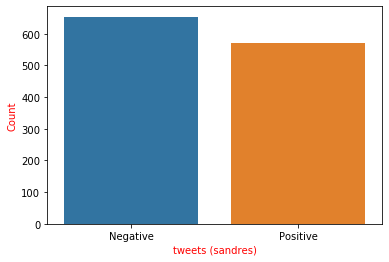

In [25]:
p = []

for i in data['sentiment']:
    
    if i == 0: 
        
        p.append(0)

    if i == 4:
        
        p.append(1)
        
sns.countplot(p)
plt.xlabel('tweets (sandres)', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1],['Negative', 'Positive'])
plt.show()

/home/niloufar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


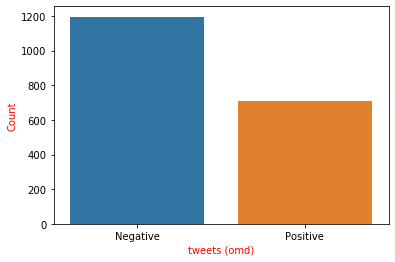

In [26]:
p1 = []

for i in data1['sentiment']:
    
    if i == 0: 
        
        p1.append(0)

    if i == 4:
        
        p1.append(1)
        
sns.countplot(p1)
plt.xlabel('tweets (omd)', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1],['Negative', 'Positive'])
plt.show()

In [29]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(final_data['tw'])
y = final_data['sentiment']

cross_validation = ShuffleSplit(10, test_size = 0.1, random_state=0) 

clf = MultinomialNB()
nb = cross_val_score(clf, x, y, cv = cross_validation).mean()

print('accuracy sandres:')
print(nb.mean())

accuracy sandres:
0.8308943089430894


In [30]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(final_data1['tw'])
y = final_data1['sentiment']

cross_validation = ShuffleSplit(10, test_size=0.01, random_state=0) 

clf = MultinomialNB()
nb = cross_val_score(clf, x, y, cv = cross_validation).mean()

print('accuracy omd:')
print(nb.mean())

accuracy omd:
0.77
